<a href="https://colab.research.google.com/github/AlaEmrani/Generative_Adversarial_networks_LIVE/blob/master/model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

    100% |████████████████████████████████| 993kB 20.6MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1QSdzW_SYr-l4bDFTdzXSTAQ1K8UwmIV3'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')  
downloaded = drive.CreateFile({'id': '1O2gH6m3OFSgpiZf5-btl1zOE5sGXxpIy'})
downloaded.GetContentFile('test.csv')  

In [0]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# df_test = df_test.drop(['Unnamed: 0'], axis=1)
df_test_x = df_test.drop(['Log_Date'], axis=1)
# df = df.drop(['Log_Time', 'Log_Date', 'AL','Departure_Time','Departure_Date' ,
#               'Price'], axis = 1 )
df = df.dropna(axis=0)
df = shuffle(df)
df = df.reset_index()
df['day'] = df['day'].astype('category').cat.codes
df = df.drop('index', axis=1)
train, test = train_test_split(df, test_size=0.2)
test_y = test['Counts']
test_x = test.drop(['Counts', 'day'], axis=1)
train_y = train['Counts']
train_x = train.drop(['Counts', 'day'], axis=1)


In [0]:
print(df_test_x.head())
# print(train_x.head())

   From  To  Month  Holiday  day
0     3  30      1        1    4
1     3  49      1        1    4
2     3  66      1        1    4
3     3  70      1        1    4
4     4  70      1        1    4


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x, train_y);


In [60]:
predictions = rf.predict(test_x)
errors = abs(predictions - test_y)
print(np.mean(np.abs((predictions - test_y) / test_y)) * 100)

75.24118487920104


In [0]:
df_test_x = df_test_x.drop(['day'], axis=1)
predictions = rf.predict(df_test_x)
# errors = abs(predictions - test_y)
# print(np.mean(np.abs((predictions - test_y) / test_y)) * 100)

In [0]:
df_test['Sales'] = np.round(predictions)

In [0]:
df_test.head()

,Log_Date,From,To,Month,Holiday,day,Sales
0,1397/01/01,3,30,1,1,4,3.0
1,1397/01/01,3,49,1,1,4,4.0
2,1397/01/01,3,66,1,1,4,4.0
3,1397/01/01,3,70,1,1,4,12.0
4,1397/01/01,4,70,1,1,4,1.0


In [0]:
from google.colab import files
# files.download('test_result.csv') 
df_test.to_csv('test_result.csv', index = False)
files.download('test_result.csv') 


**we run randomforest and linear regression till then.**

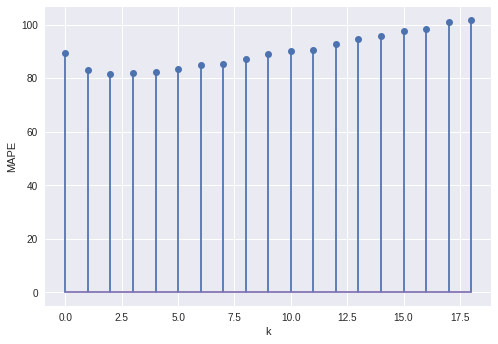

[89.54755214781686, 82.91545114752581, 81.52482945955674, 81.91480824699316, 82.34893362159464, 83.50132046958666, 84.71457260453819, 85.41014259919758, 87.07903223561544, 88.96040096089888, 90.2339665703943, 90.59191359098969, 92.7913010382866, 94.5663943595816, 95.85260791777421, 97.43453064127785, 98.3682399831992, 100.88711581806847, 101.54162565764496]


In [59]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt


test_y = test['Counts']
test_x = test.drop(['Counts', 'day'], axis=1)
train_y = train['Counts']
train_x = train.drop(['Counts', 'day'], axis=1)

def Mape(y_true , y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

acc = []
for k in range(1,20):
  clf = KNeighborsRegressor(n_neighbors=k)
  clf.fit(train_x, train_y)
  sc = Mape(test_y , clf.predict(test_x))
  acc.append(sc)
plt.stem(acc)
plt.xlabel('k')
plt.ylabel('MAPE')
plt.show()
print(acc)